In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import datetime
import config
import time



!pip install citipy
api_key= config.api_key
url = "https://api.openweathermap.org/data/2.5/weather?q=Oakland" + "&appid=" + api_key


In [2]:
response = requests.get(url).json()
response

{'coord': {'lon': -122.27, 'lat': 37.8},
 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 285.01,
  'pressure': 1013,
  'humidity': 86,
  'temp_min': 282.45,
  'temp_max': 286.45},
 'visibility': 16093,
 'wind': {'speed': 3.6, 'deg': 270},
 'clouds': {'all': 20},
 'dt': 1548996960,
 'sys': {'type': 1,
  'id': 5154,
  'message': 0.0041,
  'country': 'US',
  'sunrise': 1549033981,
  'sunset': 1549071168},
 'id': 5378538,
 'name': 'Oakland',
 'cod': 200}

1. Generate Lat & Long pair
    a. What is the range of la & long
    LAT = +/- 90
    LONG = +/-180
    b. how to generate a random number given the range
2. Using citipy get a city
3. keep track list of cities
4. 500 unique cities


In [3]:
#Generate LAT & Long
import random as random



In [4]:
from citipy import citipy

In [5]:

url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&"
# + "&appid=" + api_key

cities = []
lat = []
long = []
temp = []
humd = []
cloud = []
wind = []
name = []
country = []
date = []


number_of_cities = 500

now = datetime.datetime.now()

while len(lat) < number_of_cities: 

    # Generate random lat / long
    lat_random = (random.randint(-90,90))
    long_random =(random.randint(-180,180))
    
    # Retrieve closest city
    city = citipy.nearest_city(lat_random,long_random)
    
    # Check that it's unique
    if city not in cities:
        cities.append(city)
    
    else:
        continue
    
    # Make API request
    query_url = f"{url}appid={api_key}&q={city.city_name},{city.country_code}"
    print("Processing Record: " + city.city_name + str(len(lat)+1))
    print(query_url)
    response = requests.get(query_url).json()
    
    if response["cod"] != 200:
        continue
    
    #print(response)
    name.append(city.city_name)
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp_max'])
    humd.append(response ['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(time.time())
    

weather_dict = {
    "City": name,
    "County": country,
    "Date": date,
    "Latitude" : lat,
    "Longitude" : long,
    "Max Temperature":temp,
    "Humidity" : humd,
    "Cloudiness":cloud,
    "Wind Speed": wind
    
}

weather_dict_df = pd.DataFrame(weather_dict)
weather_dict_df.head()


Processing Record: san patricio1
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=san patricio,mx
Processing Record: nguiu2
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=nguiu,au
Processing Record: torbay2
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=torbay,ca
Processing Record: albany3
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=albany,au
Processing Record: baghdad4
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=baghdad,iq
Processing Record: saint george5
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=saint george,bm
Processing Record: jonkoping6
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac5

Processing Record: yellowknife47
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=yellowknife,ca
Processing Record: ozgon48
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ozgon,kg
Processing Record: nawa48
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=nawa,sy
Processing Record: goiatuba49
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=goiatuba,br
Processing Record: mangai50
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=mangai,cd
Processing Record: ribeira grande51
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ribeira grande,pt
Processing Record: barentsburg52
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff

Processing Record: longyearbyen94
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=longyearbyen,sj
Processing Record: parabel95
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=parabel,ru
Processing Record: vila velha96
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=vila velha,br
Processing Record: puerto ayora97
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=puerto ayora,ec
Processing Record: strezhevoy98
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=strezhevoy,ru
Processing Record: lorengau99
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=lorengau,pg
Processing Record: toftir100
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53

Processing Record: buseresere143
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=buseresere,tz
Processing Record: cidreira144
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=cidreira,br
Processing Record: bathsheba145
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=bathsheba,bb
Processing Record: mareeba146
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=mareeba,au
Processing Record: ardalstangen147
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ardalstangen,no
Processing Record: vaitupu148
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=vaitupu,wf
Processing Record: sulina148
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2

Processing Record: campoverde191
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=campoverde,pe
Processing Record: tautira192
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=tautira,pf
Processing Record: flinders193
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=flinders,au
Processing Record: berlevag194
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=berlevag,no
Processing Record: chimore195
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=chimore,bo
Processing Record: kutum196
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=kutum,sd
Processing Record: shima197
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990

Processing Record: kalmar240
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=kalmar,se
Processing Record: inirida241
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=inirida,co
Processing Record: inhambane242
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=inhambane,mz
Processing Record: jiuquan243
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=jiuquan,cn
Processing Record: salina244
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=salina,us
Processing Record: aklavik245
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=aklavik,ca
Processing Record: pleszew246
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac5

Processing Record: nemuro287
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=nemuro,jp
Processing Record: altay288
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=altay,cn
Processing Record: ucluelet289
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ucluelet,ca
Processing Record: yaan290
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=yaan,cn
Processing Record: sirsa290
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=sirsa,in
Processing Record: bonthe291
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=bonthe,sl
Processing Record: qaqortoq292
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=qaqortoq,gl

Processing Record: te anau333
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=te anau,nz
Processing Record: naze334
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=naze,jp
Processing Record: ampanihy335
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ampanihy,mg
Processing Record: codrington336
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=codrington,ag
Processing Record: yarmouth336
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=yarmouth,ca
Processing Record: ponta delgada337
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ponta delgada,pt
Processing Record: kudahuvadhoo338
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2

Processing Record: novo aripuana384
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=novo aripuana,br
Processing Record: mackay385
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=mackay,au
Processing Record: jinchang386
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=jinchang,cn
Processing Record: shenjiamen387
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=shenjiamen,cn
Processing Record: nuevitas388
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=nuevitas,cu
Processing Record: krasnovishersk389
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=krasnovishersk,ru
Processing Record: springbok390
https://api.openweathermap.org/data/2.5/weather?units=imperial&a

Processing Record: plastun434
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=plastun,ru
Processing Record: blagoveshchenka435
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=blagoveshchenka,ru
Processing Record: asuncion436
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=asuncion,py
Processing Record: balimo437
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=balimo,pg
Processing Record: pinsk437
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=pinsk,by
Processing Record: manzhouli438
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=manzhouli,cn
Processing Record: teseney439
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194fa

Processing Record: palasa483
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=palasa,in
Processing Record: san luis484
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=san luis,ar
Processing Record: gizo485
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=gizo,sb
Processing Record: ondorhaan486
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=ondorhaan,mn
Processing Record: portland486
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=portland,au
Processing Record: kavaratti487
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d990cac50&q=kavaratti,in
Processing Record: luganville488
https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=bf53520fa2194faabf0cff6d

,City,County,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,san patricio,MX,1.548998e+09,19.22,-104.70,61.03,100,0,2.73
1,torbay,CA,1.548998e+09,47.66,-52.73,19.40,57,20,27.51
2,albany,AU,1.548998e+09,-35.02,117.88,96.80,18,0,9.17
3,baghdad,IQ,1.548998e+09,33.30,44.38,48.20,100,32,2.24
4,saint george,BM,1.548998e+09,32.38,-64.68,62.60,55,75,6.93


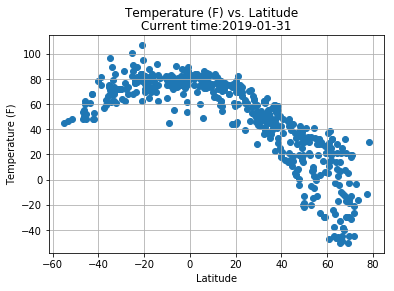

In [7]:
# Temperature (F) vs. Latitude
plt.scatter(weather_dict_df['Latitude'], weather_dict_df['Max Temperature'],marker="o")
# The temperature is not in F. It's in Kelvin
plt.suptitle("Temperature (F) vs. Latitude")
plt.title("Current time:" + now.strftime("%Y-%m-%d") )
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("TemperaturevsLatitude.png")
plt.show()

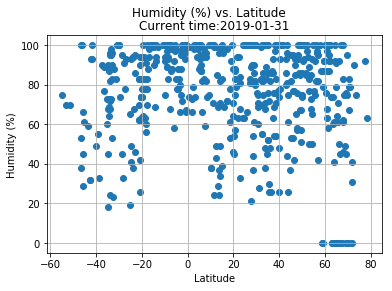

In [8]:
# Humidity (%) vs. Latitude
plt.scatter(weather_dict_df['Latitude'], weather_dict_df['Humidity'],marker="o")
plt.suptitle("Humidity (%) vs. Latitude")
plt.title("Current time:" + now.strftime("%Y-%m-%d") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("HumidityvsLatitude.png")
plt.show()

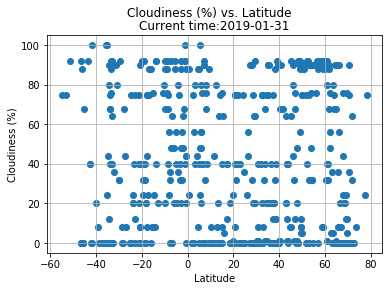

In [9]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_dict_df['Latitude'], weather_dict_df['Cloudiness'],marker="o")
plt.suptitle("Cloudiness (%) vs. Latitude")
plt.title("Current time:" + now.strftime("%Y-%m-%d") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("CloudinessvsLatitude.png")
plt.show()

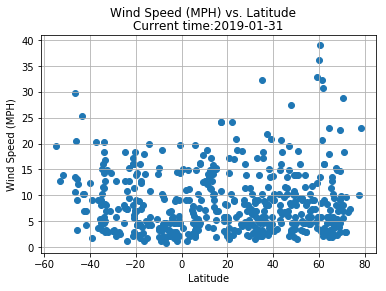

In [11]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_dict_df['Latitude'], weather_dict_df['Wind Speed'],marker="o")
# Wind speed is likely in kilometers per hour
plt.suptitle("Wind Speed (MPH) vs. Latitude")
plt.title("Current time:" + now.strftime("%Y-%m-%d") )
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("WindSpeedvsLatitude.png")
plt.show()

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.


In [12]:
weather_dict_df.to_csv("rawdata.csv", index=False, header=True)

Observations:
    1. It's generally hotter when you get closer to the equator. 
    2. Humidity is everywhere. 
    3. Windspeed is not correlated to Latitude. 